In [22]:
#IMPORTS AND LOAD DATASETS######################################

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [18]:
df_alzahimer = pd.read_excel("alzheimer_all.xlsx", index_col=0,header=1)
df_mci = pd.read_excel("mci_son_hazir.xlsx", index_col=0,header=1)
df_normal = pd.read_excel("normal_all.xlsx", index_col=0,header=1)

df_alzahimer = df_alzahimer.transpose()
df_mci = df_mci.transpose()
df_normal = df_normal.transpose()

In [19]:
frames = [df_alzahimer, df_mci, df_normal]
df = pd.concat(frames)

In [23]:
le = preprocessing.LabelEncoder()
df["'grup'"] = le.fit_transform(df["'grup'"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [24]:
df.reset_index(inplace=True)
df.rename({"index":"snr"}, axis=1, inplace=True)

In [25]:
df.head()

'SNR',snr,'White Matter (WM) volume cm3','White Matter (WM) volume %','Normal Appearing White Matter volume cm3','Normal Appearing White Matter volume %','Abnormal Appearing White Matter volume cm3','Abnormal Appearing White Matter volume %','Grey Matter (GM) volume cm3','Grey Matter (GM) volume %','Subcortical Grey Matter volume cm3',...,'PO total thickness mm','PO total thickness norm.','PO right thickness mm','PO right thickness norm.','PO left thickness mm','PO left thickness norm.','PO thickness asymmetry','Age','sex','grup'
0,29.4117,501.4625,34.1892,498.9919,34.0207,2.47060,0.168440,652.3394,44.4758,36.2114,...,1.7752,0.015624,1.8251,0.016063,1.7265,0.015195,5.5546,55.0,1.0,1
1,38.1048,394.5681,35.5483,393.9534,35.4929,0.61472,0.055383,522.9074,47.1109,31.6742,...,1.9041,0.018390,2.0102,0.019415,1.7960,0.017346,11.2555,59.0,2.0,1
2,21.6124,537.8998,35.3264,536.9601,35.2647,0.93972,0.061716,715.6973,47.0032,41.8484,...,2.2332,0.019412,1.9979,0.017366,2.3956,0.020823,-18.1020,57.0,1.0,1
3,15.3066,446.5389,32.7609,446.0205,32.7228,0.51844,0.038036,598.0019,43.8731,36.2507,...,1.8570,0.016748,1.6282,0.014685,2.0522,0.018509,-23.0362,56.0,1.0,1
4,42.6946,440.6319,33.4305,439.6862,33.3587,0.94570,0.071750,573.6842,43.5251,38.3789,...,1.4812,0.013509,1.4050,0.012814,1.5493,0.014130,-9.7702,56.0,2.0,1


In [26]:
primitive_success=[]
model_names=[]
y=df["'grup'"]
X=df.drop(["'grup'"],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=17, stratify = y)

def ML(algName):

    # Model Building / Training
    model=algName().fit(X_train,y_train)
    model_name=algName.__name__
    model_names.append(model_name)
    # Prediction
    y_pred=model.predict(X_test)
    # primitive-Success / Verification Score
    from sklearn.metrics import accuracy_score
    primitiveSuccess=accuracy_score(y_test,y_pred)
    primitive_success.append(primitiveSuccess)
    return  primitive_success,model_names,model

models=[GaussianNB,LGBMClassifier,CatBoostClassifier,KNeighborsClassifier,MLPClassifier,DecisionTreeClassifier,GradientBoostingClassifier,LogisticRegression]
for i in models:
    ML(i)

Learning rate set to 0.074575
0:	learn: 1.0286873	total: 171ms	remaining: 2m 50s
1:	learn: 0.9775838	total: 324ms	remaining: 2m 41s
2:	learn: 0.9391944	total: 470ms	remaining: 2m 36s
3:	learn: 0.8924105	total: 617ms	remaining: 2m 33s
4:	learn: 0.8528439	total: 766ms	remaining: 2m 32s
5:	learn: 0.8169354	total: 918ms	remaining: 2m 32s
6:	learn: 0.7728525	total: 1.07s	remaining: 2m 31s
7:	learn: 0.7369822	total: 1.23s	remaining: 2m 31s
8:	learn: 0.7101841	total: 1.37s	remaining: 2m 31s
9:	learn: 0.6859004	total: 1.53s	remaining: 2m 31s
10:	learn: 0.6612994	total: 1.68s	remaining: 2m 31s
11:	learn: 0.6369683	total: 1.83s	remaining: 2m 30s
12:	learn: 0.6104585	total: 1.98s	remaining: 2m 30s
13:	learn: 0.5885869	total: 2.13s	remaining: 2m 29s
14:	learn: 0.5701287	total: 2.27s	remaining: 2m 28s
15:	learn: 0.5497276	total: 2.41s	remaining: 2m 28s
16:	learn: 0.5314687	total: 2.56s	remaining: 2m 27s
17:	learn: 0.5165805	total: 2.71s	remaining: 2m 27s
18:	learn: 0.5040760	total: 2.85s	remaining:

157:	learn: 0.0546041	total: 25.1s	remaining: 2m 13s
158:	learn: 0.0539799	total: 25.3s	remaining: 2m 13s
159:	learn: 0.0534657	total: 25.4s	remaining: 2m 13s
160:	learn: 0.0530045	total: 25.6s	remaining: 2m 13s
161:	learn: 0.0526447	total: 25.8s	remaining: 2m 13s
162:	learn: 0.0522966	total: 25.9s	remaining: 2m 13s
163:	learn: 0.0516952	total: 26.1s	remaining: 2m 12s
164:	learn: 0.0510549	total: 26.2s	remaining: 2m 12s
165:	learn: 0.0506273	total: 26.4s	remaining: 2m 12s
166:	learn: 0.0501580	total: 26.6s	remaining: 2m 12s
167:	learn: 0.0496337	total: 26.7s	remaining: 2m 12s
168:	learn: 0.0491748	total: 26.9s	remaining: 2m 12s
169:	learn: 0.0488003	total: 27.1s	remaining: 2m 12s
170:	learn: 0.0483928	total: 27.2s	remaining: 2m 11s
171:	learn: 0.0481215	total: 27.4s	remaining: 2m 11s
172:	learn: 0.0477685	total: 27.5s	remaining: 2m 11s
173:	learn: 0.0471315	total: 27.7s	remaining: 2m 11s
174:	learn: 0.0468572	total: 27.9s	remaining: 2m 11s
175:	learn: 0.0467101	total: 28s	remaining: 2m

315:	learn: 0.0208124	total: 50.8s	remaining: 1m 49s
316:	learn: 0.0207376	total: 50.9s	remaining: 1m 49s
317:	learn: 0.0207193	total: 51.1s	remaining: 1m 49s
318:	learn: 0.0206256	total: 51.2s	remaining: 1m 49s
319:	learn: 0.0205482	total: 51.4s	remaining: 1m 49s
320:	learn: 0.0204353	total: 51.6s	remaining: 1m 49s
321:	learn: 0.0203099	total: 51.7s	remaining: 1m 48s
322:	learn: 0.0202246	total: 51.9s	remaining: 1m 48s
323:	learn: 0.0201530	total: 52s	remaining: 1m 48s
324:	learn: 0.0200855	total: 52.2s	remaining: 1m 48s
325:	learn: 0.0200609	total: 52.4s	remaining: 1m 48s
326:	learn: 0.0199547	total: 52.5s	remaining: 1m 48s
327:	learn: 0.0199233	total: 52.7s	remaining: 1m 47s
328:	learn: 0.0198640	total: 52.9s	remaining: 1m 47s
329:	learn: 0.0197238	total: 53s	remaining: 1m 47s
330:	learn: 0.0196741	total: 53.2s	remaining: 1m 47s
331:	learn: 0.0196014	total: 53.3s	remaining: 1m 47s
332:	learn: 0.0195844	total: 53.5s	remaining: 1m 47s
333:	learn: 0.0195152	total: 53.7s	remaining: 1m 4

471:	learn: 0.0124334	total: 1m 16s	remaining: 1m 25s
472:	learn: 0.0123744	total: 1m 16s	remaining: 1m 24s
473:	learn: 0.0123251	total: 1m 16s	remaining: 1m 24s
474:	learn: 0.0122984	total: 1m 16s	remaining: 1m 24s
475:	learn: 0.0122613	total: 1m 16s	remaining: 1m 24s
476:	learn: 0.0122105	total: 1m 16s	remaining: 1m 24s
477:	learn: 0.0121720	total: 1m 17s	remaining: 1m 24s
478:	learn: 0.0121354	total: 1m 17s	remaining: 1m 24s
479:	learn: 0.0121012	total: 1m 17s	remaining: 1m 23s
480:	learn: 0.0120940	total: 1m 17s	remaining: 1m 23s
481:	learn: 0.0120429	total: 1m 17s	remaining: 1m 23s
482:	learn: 0.0120164	total: 1m 17s	remaining: 1m 23s
483:	learn: 0.0119798	total: 1m 18s	remaining: 1m 23s
484:	learn: 0.0119660	total: 1m 18s	remaining: 1m 23s
485:	learn: 0.0119401	total: 1m 18s	remaining: 1m 22s
486:	learn: 0.0119189	total: 1m 18s	remaining: 1m 22s
487:	learn: 0.0118719	total: 1m 18s	remaining: 1m 22s
488:	learn: 0.0118322	total: 1m 18s	remaining: 1m 22s
489:	learn: 0.0118085	total:

625:	learn: 0.0085919	total: 1m 42s	remaining: 1m
626:	learn: 0.0085763	total: 1m 42s	remaining: 1m
627:	learn: 0.0085500	total: 1m 42s	remaining: 1m
628:	learn: 0.0085411	total: 1m 42s	remaining: 1m
629:	learn: 0.0085175	total: 1m 42s	remaining: 1m
630:	learn: 0.0085027	total: 1m 42s	remaining: 1m
631:	learn: 0.0084808	total: 1m 43s	remaining: 1m
632:	learn: 0.0084633	total: 1m 43s	remaining: 59.9s
633:	learn: 0.0084489	total: 1m 43s	remaining: 59.8s
634:	learn: 0.0084299	total: 1m 43s	remaining: 59.6s
635:	learn: 0.0084162	total: 1m 43s	remaining: 59.4s
636:	learn: 0.0084070	total: 1m 44s	remaining: 59.3s
637:	learn: 0.0083735	total: 1m 44s	remaining: 59.1s
638:	learn: 0.0083370	total: 1m 44s	remaining: 59s
639:	learn: 0.0083170	total: 1m 44s	remaining: 58.8s
640:	learn: 0.0083003	total: 1m 44s	remaining: 58.7s
641:	learn: 0.0082854	total: 1m 44s	remaining: 58.5s
642:	learn: 0.0082518	total: 1m 45s	remaining: 58.4s
643:	learn: 0.0082395	total: 1m 45s	remaining: 58.2s
644:	learn: 0.00

783:	learn: 0.0064068	total: 2m 18s	remaining: 38.1s
784:	learn: 0.0063987	total: 2m 18s	remaining: 37.9s
785:	learn: 0.0063834	total: 2m 18s	remaining: 37.7s
786:	learn: 0.0063804	total: 2m 18s	remaining: 37.6s
787:	learn: 0.0063660	total: 2m 18s	remaining: 37.4s
788:	learn: 0.0063501	total: 2m 19s	remaining: 37.2s
789:	learn: 0.0063400	total: 2m 19s	remaining: 37s
790:	learn: 0.0063320	total: 2m 19s	remaining: 36.9s
791:	learn: 0.0063304	total: 2m 19s	remaining: 36.7s
792:	learn: 0.0063245	total: 2m 19s	remaining: 36.5s
793:	learn: 0.0063196	total: 2m 20s	remaining: 36.3s
794:	learn: 0.0063072	total: 2m 20s	remaining: 36.2s
795:	learn: 0.0063036	total: 2m 20s	remaining: 36s
796:	learn: 0.0062940	total: 2m 20s	remaining: 35.8s
797:	learn: 0.0062869	total: 2m 20s	remaining: 35.7s
798:	learn: 0.0062844	total: 2m 21s	remaining: 35.5s
799:	learn: 0.0062749	total: 2m 21s	remaining: 35.3s
800:	learn: 0.0062662	total: 2m 21s	remaining: 35.1s
801:	learn: 0.0062520	total: 2m 21s	remaining: 35s

940:	learn: 0.0051697	total: 2m 49s	remaining: 10.6s
941:	learn: 0.0051629	total: 2m 49s	remaining: 10.4s
942:	learn: 0.0051531	total: 2m 49s	remaining: 10.2s
943:	learn: 0.0051441	total: 2m 49s	remaining: 10.1s
944:	learn: 0.0051419	total: 2m 49s	remaining: 9.88s
945:	learn: 0.0051376	total: 2m 49s	remaining: 9.7s
946:	learn: 0.0051318	total: 2m 50s	remaining: 9.52s
947:	learn: 0.0051277	total: 2m 50s	remaining: 9.34s
948:	learn: 0.0051244	total: 2m 50s	remaining: 9.16s
949:	learn: 0.0051087	total: 2m 50s	remaining: 8.98s
950:	learn: 0.0051027	total: 2m 50s	remaining: 8.8s
951:	learn: 0.0050995	total: 2m 51s	remaining: 8.62s
952:	learn: 0.0050870	total: 2m 51s	remaining: 8.44s
953:	learn: 0.0050847	total: 2m 51s	remaining: 8.26s
954:	learn: 0.0050778	total: 2m 51s	remaining: 8.08s
955:	learn: 0.0050712	total: 2m 51s	remaining: 7.9s
956:	learn: 0.0050659	total: 2m 51s	remaining: 7.72s
957:	learn: 0.0050607	total: 2m 52s	remaining: 7.54s
958:	learn: 0.0050539	total: 2m 52s	remaining: 7.

/Users/ahmetokanarik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
classification=pd.DataFrame( primitive_success,columns=
                                 ['accuracy_Score'],index=[model_names]).sort_values(by='accuracy_Score',ascending=False)
classification

,accuracy_Score
LGBMClassifier,0.962025
GradientBoostingClassifier,0.962025
CatBoostClassifier,0.924051
GaussianNB,0.886076
DecisionTreeClassifier,0.860759
LogisticRegression,0.810127
MLPClassifier,0.696203
KNeighborsClassifier,0.531646


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=17, stratify = y)
lgbm_model = LGBMClassifier(random_state=17).fit(X_train, y_train)

In [29]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9620253164556962

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[26,  1,  0],
       [ 2, 21,  0],
       [ 0,  0, 29]])

In [31]:
?LGBMClassifier

In [32]:
target_names = ['normal','alzheimer','mci']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.96      0.93      0.95        28
   alzheimer       0.91      0.95      0.93        22
         mci       1.00      1.00      1.00        29

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



In [33]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.8481012658227848
Accuracy Polynomial Kernel: 0.46835443037974683
Accuracy Radial Basis Kernel: 0.3670886075949367
Accuracy Sigmoid Kernel: 0.3670886075949367


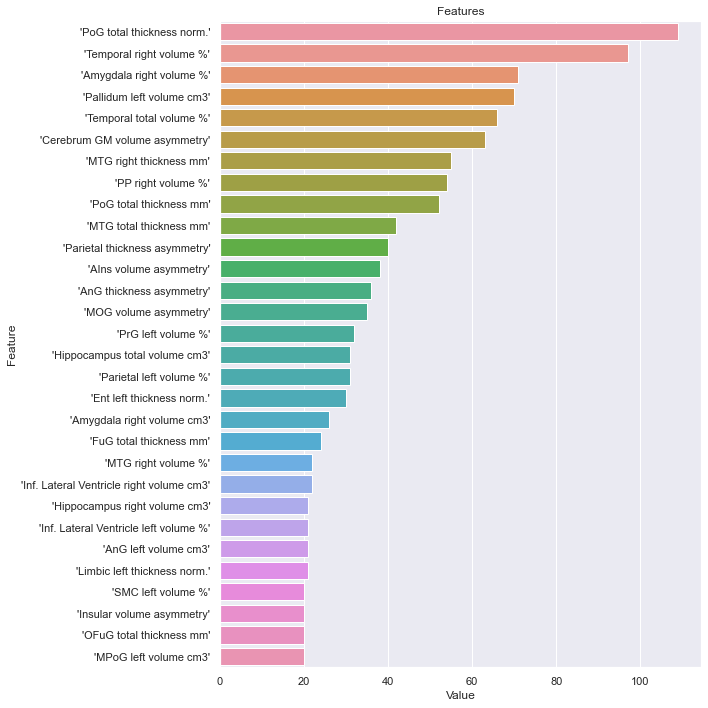

<Figure size 432x288 with 0 Axes>

In [34]:
def plot_importance(model, features, num=len(X), save=True):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')
        

plot_importance(lgbm_model, X, 30)